In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Fetching dataset into DataFrame
df = pd.read_excel('/kaggle/input/Cell-Cycle-Set.xlsx')

In [2]:
# Dropping columns with NaN values
df.dropna(inplace = True)
df.shape

(397, 10)

In [3]:
# A look into the dataset
df.head

<bound method NDFrame.head of     Gene_Name  mean_RNA_G1  mean_RNA_S  mean_RNA_G2  mean_protein_G1  \
1       RBM47    10.330107   10.396423    10.677257        24.748020   
2       ADAM9    12.321340   12.203630    12.233293        19.083593   
3        UBA6    10.827333   10.758463    10.685847        24.614467   
5       SHTN1    10.845517   10.824347    10.634980        26.112690   
6        SIL1     9.042438    8.924093     9.035878        22.750520   
..        ...          ...         ...          ...              ...   
494   ALDH1B1    11.115773   11.158333    11.434383        26.024680   
495    MRPL12    11.251870   11.351043    11.255327        26.739813   
496      NQO1    13.013263   13.179313    13.048477        28.422773   
497     IFIT3     9.048456    8.599903     9.105025        23.592930   
498    NUP155    13.525467   13.582677    13.524457        26.779417   

     mean_protein_S  mean_protein_G2  \
1         22.426777        24.651200   
2         16.248873      

# Week 1
## Task 1
* **Generate a histogram of one of the cell cycle stages of the RNA and protein distribution.**

Below, I have generated a histogram for each of the represented stages in the dataset - G1, S, and G2.

* **Do you notice anything interesting with regards to the mean/variance of the distribution?**

As can be seen, proteins have greater variance than RNA as well as a higher mean. That is true for each individual cell cycle stage. The difference is caused by the fact that proteins have a longer lifetime than RNA.
> The lifetime of mRNA molecules is usually short in comparison with the fundamental time scale of cell biology defined by the time between cell divisions. The majority of mRNA molecules have lifetimes between 3 and 8 minutes. The measured lifetimes using the method of translation-inhibition reveal the longer lifetimes of proteins in comparison with their mRNA counterparts, with a mean lifetime of roughly 40 minutes [1]

Since proteins stay around longer after their creation, we see a greater variance in the protein distribution for a specific cell cycle stage and the amount of proteins present at a given time is also higher than the amount of RNA.

[1] [http://book.bionumbers.org/how-fast-do-rnas-and-proteins-degrade/](http://book.bionumbers.org/how-fast-do-rnas-and-proteins-degrade/)


Text(0.5, 0, 'Mean G1 Expression')

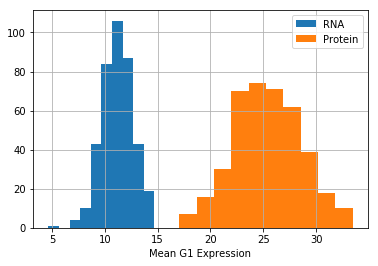

In [4]:
fig1, ax1 = plt.subplots()
df.mean_RNA_G1.hist(ax=ax1, label='RNA')
df.mean_protein_G1.hist(ax=ax1, label='Protein')
ax1.legend()
ax1.set_xlabel('Mean G1 Expression')

Text(0.5, 0, 'Mean S Expression')

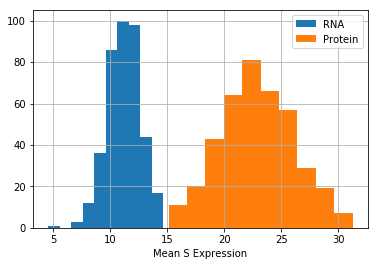

In [5]:
fig1, ax1 = plt.subplots()
df.mean_RNA_S.hist(ax=ax1, label='RNA')
df.mean_protein_S.hist(ax=ax1, label='Protein')
ax1.legend()
ax1.set_xlabel('Mean S Expression')

Text(0.5, 0, 'Mean G2 Expression')

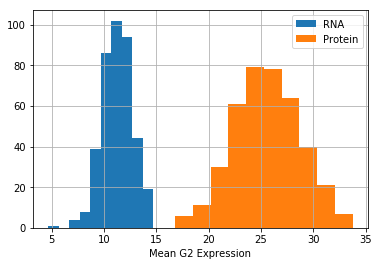

In [6]:
fig1, ax1 = plt.subplots()
df.mean_RNA_G2.hist(ax=ax1, label='RNA')
df.mean_protein_G2.hist(ax=ax1, label='Protein')
ax1.legend()
ax1.set_xlabel('Mean G2 Expression')

## Task 2
* **Look at the pairwise correlations between each of the RNA/protein columns (this can be achieved using the corr() function).** 

Both a table and a colour-coded representation of pairwise correlations between each of the RNA/protein columns are presented below. They show us whether and how strongly those RNA/protein column pairs are related.
In the colour-coded graph below, light yellow is a maximum positive correlation relationship 1.0 and black represents the lowest correlation relationship, which in the given dataset is around 0.5. The correlation relationship shows us how much one grows depending on the other.

* **Does the change in timestep have much effect on the relationship(s) between RNA and protein?**

The correlation between RNA and protein for each cell cycle stage is very low and there is no change in that fact over different timesteps.

In [7]:
df.corr()

,mean_RNA_G1,mean_RNA_S,mean_RNA_G2,mean_protein_G1,mean_protein_S,mean_protein_G2
mean_RNA_G1,1.000000,0.991063,0.992023,0.522658,0.541428,0.544206
mean_RNA_S,0.991063,1.000000,0.986836,0.514705,0.536190,0.534322
mean_RNA_G2,0.992023,0.986836,1.000000,0.510364,0.529690,0.532565
mean_protein_G1,0.522658,0.514705,0.510364,1.000000,0.970289,0.977016
mean_protein_S,0.541428,0.536190,0.529690,0.970289,1.000000,0.975964
mean_protein_G2,0.544206,0.534322,0.532565,0.977016,0.975964,1.000000


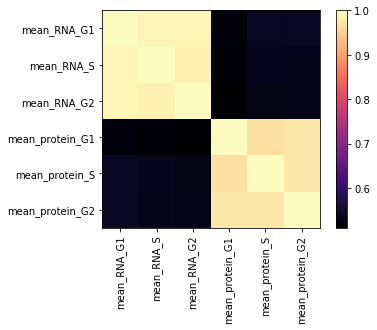

In [8]:
fig2,ax2 = plt.subplots()
cax = ax2.imshow(df.corr(), cmap='magma')
ax2.set_xticklabels(df.columns, rotation=90)
ax2.set_yticklabels(df.columns)
fig2.colorbar(cax)

## Task 3
* **Generate a scatterplot of the RNA versus. protein for each cell cycle stage.**

A separate scatterplot for each cell cycle stage of RNA vs protein is presented below with a different colour for each stage (red - G1, green - S, blue - G2).

* **Fit a linear model to the data, can we infer protein concentration from RNA concentration?**

Both the scatterplot and the correlation graph show that we can't infer protein concentration from that of RNA alone. The correlation between RNA and protein is very low and if we look at the distribution of data points for the genes on the scatterplot in relation to the linear line drawn, we can also see that the data points are all over the place and most of them do not even closely follow the growth of the linear line.

> The ratios of mRNA and protein are not constant for most genes. While it is conceivable that additional data on other factors that influence protein levels (for example, degradation rates) will permit more accurate predictions, the current data do not support high accuracy for most genes when using mRNA alone. [2]

[2] [https://www.nature.com/articles/nature23293](https://www.nature.com/articles/nature23293)

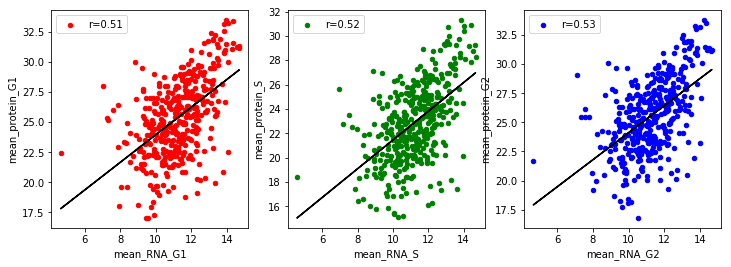

In [9]:
from numpy.polynomial.polynomial import polyfit

# Plotting scatterplot for G1 stage
fig3, ax3 = plt.subplots(ncols=3, figsize=(12,4))
df.plot.scatter('mean_RNA_G1', 'mean_protein_G1', ax=ax3[0], color='r', label='r={:0.2f}'.format(
            spearmanr(df.mean_RNA_G1.values, df.mean_protein_G1.values)[0]
        ))
# Fitting a linear model for G1 stage
b, m = polyfit(df.mean_RNA_G1.values, df.mean_protein_G1.values, 1)
ax3[0].plot(df.mean_RNA_G1.values, b + m * df.mean_RNA_G1.values, color='k')

# Plotting a scatterplot for S stage
df.plot.scatter('mean_RNA_S', 'mean_protein_S', ax=ax3[1], color='g', label='r={:0.2f}'.format(
            spearmanr(df.mean_RNA_S.values, df.mean_protein_S.values)[0]
        ))
# Fitting a linear model for S stage
b, m = polyfit(df.mean_RNA_S.values, df.mean_protein_S.values, 1)
ax3[1].plot(df.mean_RNA_S.values, b + m * df.mean_RNA_S.values, color='k')

# Plotting a scatterplot for G2 stage
df.plot.scatter('mean_RNA_G2', 'mean_protein_G2', ax=ax3[2], color='b', label='r={:0.2f}'.format(
            spearmanr(df.mean_RNA_G2.values, df.mean_protein_G2.values)[0]
        ))
# Fitting a linear model for G2 stage
b, m = polyfit(df.mean_RNA_G2.values, df.mean_protein_G2.values, 1)
ax3[2].plot(df.mean_RNA_G2.values, b + m * df.mean_RNA_G2.values, color='k')

# Week 2
## Task 1
* **Find all genes that contain 'cell cycle' in their GOBP term and plot them as a scatterplot (with different colour) overlaid across all genes for each cell cycle phase.**

> A GO Biological Process (GOBP) is a series of molecular events, with a defined beginning and end [3].

On the RNA vs protein scatterplot, red stands for genes that contain 'cell cycle' in their GOBP term and yellow represents all genes. As can be seen, we have filtered out a significant amount of genes and narrowed down the data. We have gone from 397 entries to 71.

* **Is there a stronger/weaker correlation?**

There is now a weaker correlation, 'cell cycle' in the GOBP term isn't specific enough to form a stronger correlation relation between RNA and proteins. On the scatter plot, data is still spread all over the place, not really following the linear line and the correlation table and figure report lower values around 0.4 for the pairwise correlations of proteins and RNA. 

[3] [https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4474415/](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4474415/)

71


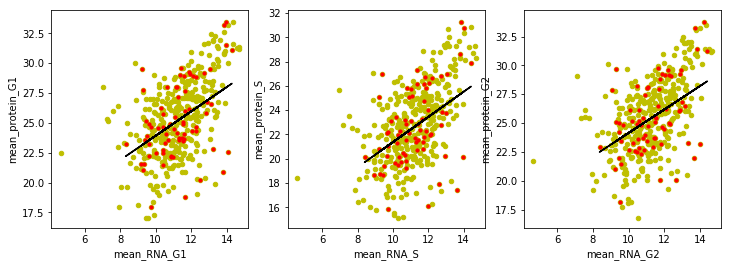

In [10]:
# Getting a new dataframe called 'gobp' with just genes that contain 'cell cycle' in their GOBP
gobp = df[df.GOBP.str.contains('cell cycle')]

fig4,ax4 = plt.subplots(ncols=3, figsize=(12,4))

# Plot for G1 phase
df.plot.scatter('mean_RNA_G1', 'mean_protein_G1', ax=ax4[0], color='y')
ax4[0].scatter(gobp.mean_RNA_G1, gobp.mean_protein_G1, color='r', s=10.)

b, m = polyfit(gobp.mean_RNA_G1.values, gobp.mean_protein_G1.values, 1)
ax4[0].plot(gobp.mean_RNA_G1.values, b + m * gobp.mean_RNA_G1.values, color='k')


# Plot for S phase
df.plot.scatter('mean_RNA_S', 'mean_protein_S', ax=ax4[1], color='y')
ax4[1].scatter(gobp.mean_RNA_S, gobp.mean_protein_S, color='r', s=10.)

b, m = polyfit(gobp.mean_RNA_S.values, gobp.mean_protein_S.values, 1)
ax4[1].plot(gobp.mean_RNA_S.values, b + m * gobp.mean_RNA_S.values, color='k')

# Plot for G2 phase
df.plot.scatter('mean_RNA_G2', 'mean_protein_G2', ax=ax4[2], color='y')
ax4[2].scatter(gobp.mean_RNA_G2, gobp.mean_protein_G2, color='r', s=10.)

b, m = polyfit(gobp.mean_RNA_G2.values, gobp.mean_protein_G2.values, 1)
ax4[2].plot(gobp.mean_RNA_G2.values, b + m * gobp.mean_RNA_G2.values, color='k')

print(len(gobp))

In [11]:
gobp.corr()

,mean_RNA_G1,mean_RNA_S,mean_RNA_G2,mean_protein_G1,mean_protein_S,mean_protein_G2
mean_RNA_G1,1.000000,0.993228,0.974701,0.436546,0.434837,0.453532
mean_RNA_S,0.993228,1.000000,0.980132,0.442141,0.438388,0.457854
mean_RNA_G2,0.974701,0.980132,1.000000,0.428266,0.426218,0.453327
mean_protein_G1,0.436546,0.442141,0.428266,1.000000,0.992084,0.991121
mean_protein_S,0.434837,0.438388,0.426218,0.992084,1.000000,0.986301
mean_protein_G2,0.453532,0.457854,0.453327,0.991121,0.986301,1.000000


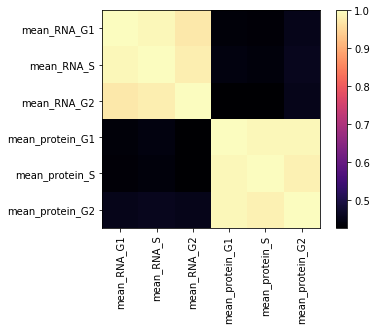

In [12]:
fig41,ax41 = plt.subplots()
cax = ax41.imshow(gobp.corr(), cmap='magma')
ax41.set_xticklabels(df.columns, rotation=90)
ax41.set_yticklabels(df.columns)
fig41.colorbar(cax)

## Task 2
* **Repeat task 1 by finding genes that contain 'ribosome' in their GOCC term.**

> GOCCs (Gene Ontology Cellular Components) are the locations relative to cellular structures in which a gene product performs a function, either cellular compartments (e.g., mitochondrion), or stable macromolecular complexes of which they are parts (e.g., the ribosome). Unlike the other aspects of GO, cellular component classes refer not to processes but rather a cellular anatomy. [4]

Below we have an RNA vs protein scatter plot representation of genes that contain 'ribosome' in their GOCC term over all the genes in the dataset. Those containing 'ribosome' are plotted in blue and the rest are represented in yellow. This time, we have narrowed the dataset down to just 19 genes.

These data points are way more specific than the results of filtering the dataset by 'cell cycle' in the genes' GOBP term. The blue points fall much closer to the fitted linear model and, finally, we can also see a significant increase in the correlation table and figure. The correlation relationship between RNA and proteins has now jumped to a value around 0.8.

> Ribosomes are the sites in a cell in which protein synthesis takes place. Cells have many ribosomes, and the exact number depends on how active a particular cell is in synthesizing proteins. [5]

Thus, it is obvious that when a gene's GOCC includes 'ribosome', indicating that the given gene product performs a function there, and knowing that protein synthesys takes place in ribosomes, we can indeed infer protein concentration from that of RNA quite well when the GOCC includes 'ribosome'.

[4] [http://geneontology.org/docs/ontology-documentation/](http://geneontology.org/docs/ontology-documentation/)

[5] [https://www.nature.com/scitable/topicpage/ribosomes-transcription-and-translation-14120660/](https://www.nature.com/scitable/topicpage/ribosomes-transcription-and-translation-14120660/)

19


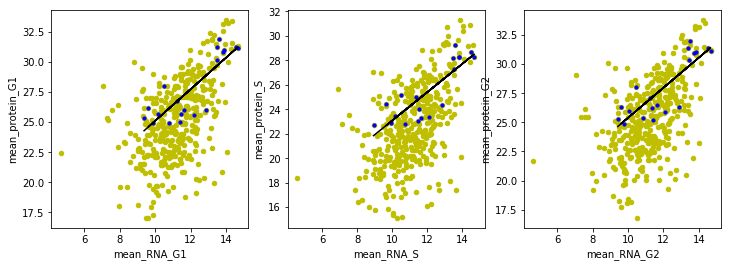

In [13]:
# Getting a new dataframe called 'gocc' with just genes that contain 'ribosome' in their GOCC
gocc = df[df.GOCC.str.contains('ribosome')]

fig5,ax5 = plt.subplots(ncols=3, figsize=(12,4))

# Plot for G1 phase
df.plot.scatter('mean_RNA_G1', 'mean_protein_G1', ax=ax5[0], color='y')
ax5[0].scatter(gocc.mean_RNA_G1, gocc.mean_protein_G1, color='b', s=10.)

b, m = polyfit(gocc.mean_RNA_G1.values, gocc.mean_protein_G1.values, 1)
ax5[0].plot(gocc.mean_RNA_G1.values, b + m * gocc.mean_RNA_G1.values, color='k')

# Plot for S phase
df.plot.scatter('mean_RNA_S', 'mean_protein_S', ax=ax5[1], color='y')
ax5[1].scatter(gocc.mean_RNA_S, gocc.mean_protein_S, color='b', s=10.)

b, m = polyfit(gocc.mean_RNA_S.values, gocc.mean_protein_S.values, 1)
ax5[1].plot(gocc.mean_RNA_S.values, b + m * gocc.mean_RNA_S.values, color='k')

# Plot for G2 phase
df.plot.scatter('mean_RNA_G2', 'mean_protein_G2', ax=ax5[2], color='y')
ax5[2].scatter(gocc.mean_RNA_G2, gocc.mean_protein_G2, color='b', s=10.)

b, m = polyfit(gocc.mean_RNA_G2.values, gocc.mean_protein_G2.values, 1)
ax5[2].plot(gocc.mean_RNA_G2.values, b + m * gocc.mean_RNA_G2.values, color='k')

print(len(gocc))

In [14]:
gocc.corr()

,mean_RNA_G1,mean_RNA_S,mean_RNA_G2,mean_protein_G1,mean_protein_S,mean_protein_G2
mean_RNA_G1,1.000000,0.997851,0.999540,0.840801,0.848882,0.852274
mean_RNA_S,0.997851,1.000000,0.996900,0.832572,0.844801,0.845251
mean_RNA_G2,0.999540,0.996900,1.000000,0.836108,0.844280,0.847706
mean_protein_G1,0.840801,0.832572,0.836108,1.000000,0.990856,0.998165
mean_protein_S,0.848882,0.844801,0.844280,0.990856,1.000000,0.990858
mean_protein_G2,0.852274,0.845251,0.847706,0.998165,0.990858,1.000000


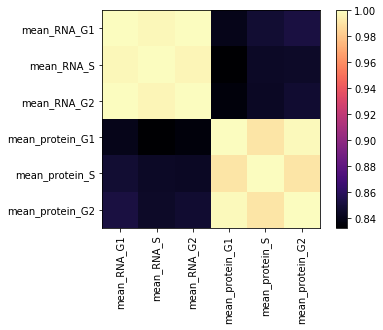

In [15]:
fig51,ax51 = plt.subplots()
cax = ax51.imshow(gocc.corr(), cmap='magma')
ax51.set_xticklabels(df.columns, rotation=90)
ax51.set_yticklabels(df.columns)
fig51.colorbar(cax)

## Task 3
* **Count the number of occurrences of every GOBP term across all genes, what are some of the difficulties that arise when using these terms?**

The biological processes that only appear once are very specific terms for a specific gene and don't add relevance for statistical analysis of the entire dataset. The opposite case of a biological process appearing in the GOBP of almost every gene or the majority of the genes is also not useful because these processes are too general. For example, 'cellular process' appears in 377 out of 397 of the entries.

In [16]:
print(df.GOBP.str.split(';',expand=True).stack().value_counts())

cellular process                                                                377
metabolic process                                                               273
cellular metabolic process                                                      260
primary metabolic process                                                       255
biological regulation                                                           236
                                                                               ... 
CUT catabolic process                                                             1
clathrin-mediated endocytosis                                                     1
telomere maintenance via recombination                                            1
regulation of transposition                                                       1
regulation of DNA damage response, signal transduction by p53 class mediator      1
Length: 2854, dtype: int64


## Task 4
* **Calculate the change in mRNA/protein level across the cell cycle by taking the difference at each stage (G1-S, S-G2, G2-G1), and standardize the differences by mean-centering and variance scaling.**
* **Repeat tasks 1 and 2 by plotting the changes in levels with GOBP/GOCC labelling.**
* **What do we notice about changes in the cell cycle? Is there any apparent clustering of GO terms?**

The genes clustered at or very close to 0 are not that involved in the cell cycle, whereas those further away from 0 (which indicates a change or protein/RNA concentration between 2 cell cycle phases) are more involved. There are also some clear outliers scattered far away from the overall cluster. As we can see, all genes with 'ribosomes' in their GOCC are slightly further from 0 so thus they are always involved. As a matter of fact, they are essential for RNA to protein synthesys as was discussed earlier.

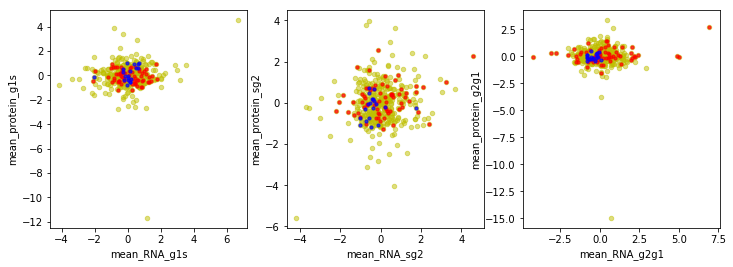

In [17]:
# Change in mRNA level across the cell cycle for each stage
df['mean_RNA_g1s'] = (df.mean_RNA_S - df.mean_RNA_G1)
df['mean_RNA_sg2'] = (df.mean_RNA_G2 - df.mean_RNA_S)
df['mean_RNA_g2g1'] = (df.mean_RNA_G2 - df.mean_RNA_G1)

# Change in protein level across the cell cycle for each stage
df['mean_protein_g1s'] = (df.mean_protein_S - df.mean_protein_G1)
df['mean_protein_sg2'] = (df.mean_protein_G2 - df.mean_protein_S)
df['mean_protein_g2g1'] = (df.mean_protein_G2 - df.mean_protein_G1)

# Standardising by mean-centering and variance scaling
df.iloc[:,-6:] = (df.iloc[:,-6:] - df.iloc[:,-6:].mean(axis=0)) / df.iloc[:,-6:].std(axis=0)

# Retrieve the two dataframes from task 1 and task 2 again
gobp = df[df.GOBP.str.contains('cell cycle')]
gocc = df[df.GOCC.str.contains('ribosome')]

fig6,ax6 = plt.subplots(ncols=3, figsize=(12,4))

# Plot all genes in yellow for all phases
df.plot.scatter('mean_RNA_g1s', 'mean_protein_g1s', ax=ax6[0], color='y', alpha=.5)
df.plot.scatter('mean_RNA_sg2', 'mean_protein_sg2', ax=ax6[1], color='y', alpha=.5)
df.plot.scatter('mean_RNA_g2g1', 'mean_protein_g2g1', ax=ax6[2], color='y', alpha=.5)

# Plot genes containing 'cell cycle' in GOBP in red for all phases
ax6[0].scatter(gobp.mean_RNA_g1s, gobp.mean_protein_g1s, color='r', s=10., alpha=.7)
ax6[1].scatter(gobp.mean_RNA_sg2, gobp.mean_protein_sg2, color='r', s=10., alpha=.7)
ax6[2].scatter(gobp.mean_RNA_g2g1, gobp.mean_protein_g2g1, color='r', s=10., alpha=.7)

# Plot genes containing 'ribosome' in GOCC in blue for all phases
ax6[0].scatter(gocc.mean_RNA_g1s, gocc.mean_protein_g1s, color='b', s=10., alpha=.7)
ax6[1].scatter(gocc.mean_RNA_sg2, gocc.mean_protein_sg2, color='b', s=10., alpha=.7)
ax6[2].scatter(gocc.mean_RNA_g2g1, gocc.mean_protein_g2g1, color='b', s=10., alpha=.7)

# Additional work
## 'ATPase activity' in GOMF
> GOMF (Gene Ontology Molecular Function) terms describe activities that occur at the molecular level, such as “catalysis” or “transport”. GO molecular function terms represent activities rather than the entities (molecules or complexes) that perform the actions, and do not specify where, when, or in what context the action takes place. [4]

> Adenosine triphosphate-hydrolyzing enzymes, or ATPases, play a principal role in a wide variety of cellular functions. They are a class of enzymes that catalyze the decomposition of ATP into ADP and a free phosphate ion. ATPases have many functions, one of those functions is synthesis of biological macromolecules, such as DNA, RNA, proteins, and lipids. [6]

[6] [https://www.bellbrooklabs.com/atpase-activity-assay-for-drug-discovery/](https://www.bellbrooklabs.com/atpase-activity-assay-for-drug-discovery/)

Selecting 'ATPase activity' in the GOMF term does narrow the dataset down quite significantly to 24 entries, but with such a general keyword we actually see a significant drop in the correlation between RNA and protein. Even lower correlation that that for 'cell cycle' in GOBP.

24


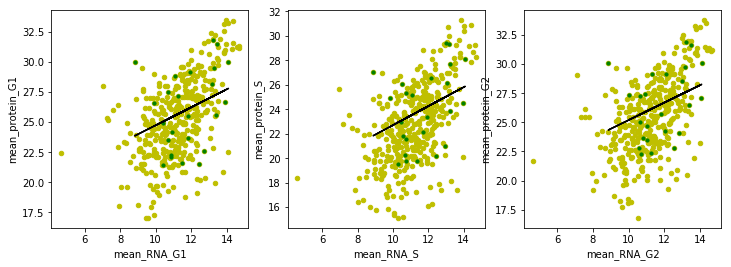

In [18]:
# Getting a new dataframe called 'gomf' with just genes that contain 'ATPase activity' in their GOMF
gomf = df[df.GOMF.str.contains('ATPase activity')]

fig7,ax7 = plt.subplots(ncols=3, figsize=(12,4))

# Plot for G1 phase
df.plot.scatter('mean_RNA_G1', 'mean_protein_G1', ax=ax7[0], color='y')
ax7[0].scatter(gomf.mean_RNA_G1, gomf.mean_protein_G1, color='g', s=10.)
b, m = polyfit(gomf.mean_RNA_G1.values, gomf.mean_protein_G1.values, 1)
ax7[0].plot(gomf.mean_RNA_G1.values, b + m * gomf.mean_RNA_G1.values, color='k')

# Plot for S phase
df.plot.scatter('mean_RNA_S', 'mean_protein_S', ax=ax7[1], color='y')
ax7[1].scatter(gomf.mean_RNA_S, gomf.mean_protein_S, color='g', s=10.)
b, m = polyfit(gomf.mean_RNA_S.values, gomf.mean_protein_S.values, 1)
ax7[1].plot(gomf.mean_RNA_S.values, b + m * gomf.mean_RNA_S.values, color='k')

# Plot for G2 phase
df.plot.scatter('mean_RNA_G2', 'mean_protein_G2', ax=ax7[2], color='y')
ax7[2].scatter(gomf.mean_RNA_G2, gomf.mean_protein_G2, color='g', s=10.)
b, m = polyfit(gomf.mean_RNA_G2.values, gomf.mean_protein_G2.values, 1)
ax7[2].plot(gomf.mean_RNA_G2.values, b + m * gomf.mean_RNA_G2.values, color='k')

print(len(gomf))

In [19]:
gomf.corr().head(6)

,mean_RNA_G1,mean_RNA_S,mean_RNA_G2,mean_protein_G1,mean_protein_S,mean_protein_G2,mean_RNA_g1s,mean_RNA_sg2,mean_RNA_g2g1,mean_protein_g1s,mean_protein_sg2,mean_protein_g2g1
mean_RNA_G1,1.000000,0.990587,0.993338,0.314879,0.368404,0.353147,-0.021664,-0.093860,-0.169631,0.293110,-0.231960,0.058697
mean_RNA_S,0.990587,1.000000,0.984462,0.291648,0.346596,0.327326,0.115390,-0.197006,-0.163979,0.315149,-0.257621,0.055989
mean_RNA_G2,0.993338,0.984462,1.000000,0.301245,0.354621,0.340614,-0.018056,-0.021788,-0.054931,0.298047,-0.217840,0.075300
mean_protein_G1,0.314879,0.291648,0.301245,1.000000,0.994285,0.994613,-0.154850,0.021428,-0.152068,-0.497119,-0.293463,-0.694524
mean_protein_S,0.368404,0.346596,0.354621,0.994285,1.000000,0.993158,-0.141933,0.006593,-0.159369,-0.401645,-0.352623,-0.661203
mean_protein_G2,0.353147,0.327326,0.340614,0.994613,0.993158,1.000000,-0.171961,0.038101,-0.146961,-0.460072,-0.240931,-0.616206


## 'Cytoplasmic part' in GOCC
> Ribosomes are found ‘free’ in the cytoplasm or bound to the endoplasmic reticulum (ER) to form rough ER. [7]

Since all of the genes that contained 'ribosome' in their GOCC also had 'cytoplasmic part', it seemed to be worth investigating that keyword as well. However, as we can see, it is a very general keyword that applies to most of the genes and we get a correlation of about 0.5, which is very similar to our result with 'cell cycle' in GOBP.

[7] [https://bscb.org/learning-resources/softcell-e-learning/ribosome/](https://bscb.org/learning-resources/softcell-e-learning/ribosome/)

248


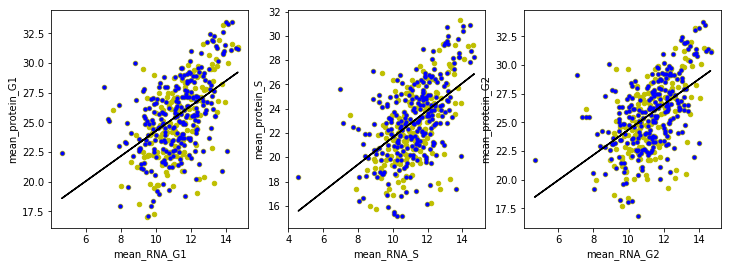

In [20]:
# Getting a new dataframe called 'gocc' with just genes that contain 'cytoplasmic part' in their GOCC
gocc2 = df[df.GOCC.str.contains('cytoplasmic part')]

fig8,ax8 = plt.subplots(ncols=3, figsize=(12,4))

# Plot for G1 phase
df.plot.scatter('mean_RNA_G1', 'mean_protein_G1', ax=ax8[0], color='y')
ax8[0].scatter(gocc2.mean_RNA_G1, gocc2.mean_protein_G1, color='b', s=10.)
b, m = polyfit(gocc2.mean_RNA_G1.values, gocc2.mean_protein_G1.values, 1)
ax8[0].plot(gocc2.mean_RNA_G1.values, b + m * gocc2.mean_RNA_G1.values, color='k')

# Plot for S phase
df.plot.scatter('mean_RNA_S', 'mean_protein_S', ax=ax8[1], color='y')
ax8[1].scatter(gocc2.mean_RNA_S, gocc2.mean_protein_S, color='b', s=10.)
b, m = polyfit(gocc2.mean_RNA_S.values, gocc2.mean_protein_S.values, 1)
ax8[1].plot(gocc2.mean_RNA_S.values, b + m * gocc2.mean_RNA_S.values, color='k')

# Plot for G2 phase
df.plot.scatter('mean_RNA_G2', 'mean_protein_G2', ax=ax8[2], color='y')
ax8[2].scatter(gocc2.mean_RNA_G2, gocc2.mean_protein_G2, color='b', s=10.)
b, m = polyfit(gocc2.mean_RNA_G2.values, gocc2.mean_protein_G2.values, 1)
ax8[2].plot(gocc2.mean_RNA_G2.values, b + m * gocc2.mean_RNA_G2.values, color='k')

print(len(gocc2))

In [21]:
gocc2.corr().head(6)

,mean_RNA_G1,mean_RNA_S,mean_RNA_G2,mean_protein_G1,mean_protein_S,mean_protein_G2,mean_RNA_g1s,mean_RNA_sg2,mean_RNA_g2g1,mean_protein_g1s,mean_protein_sg2,mean_protein_g2g1
mean_RNA_G1,1.000000,0.993228,0.992682,0.510427,0.532151,0.535359,-0.145652,-0.011172,-0.153704,0.115818,-0.062389,0.073420
mean_RNA_S,0.993228,1.000000,0.988962,0.500746,0.524231,0.524447,-0.029721,-0.081794,-0.128088,0.121960,-0.076304,0.069049
mean_RNA_G2,0.992682,0.988962,1.000000,0.505580,0.526308,0.532151,-0.119010,0.066779,-0.033253,0.111687,-0.048240,0.080092
mean_protein_G1,0.510427,0.500746,0.505580,1.000000,0.965606,0.968056,-0.127347,0.028736,-0.087550,-0.068373,-0.130196,-0.173485
mean_protein_S,0.532151,0.524231,0.526308,0.965606,1.000000,0.981301,-0.114262,0.010011,-0.097741,0.193379,-0.241888,0.015283
mean_protein_G2,0.535359,0.524447,0.532151,0.968056,0.981301,1.000000,-0.140023,0.047865,-0.076475,0.112386,-0.050602,0.078987


## Author
Signe Rebassoo, sr2u17, ID: 29554896, University of Southampton

## Author
Signe Rebassoo, sr2u17, ID: 29554896, University of Southampton